# DAML 05 - Stats

Michal Grochmal <michal.grochmal@city.ac.uk>

To not make mistakes in analysis a deal of statistical knowledge is required.
We will review some statistics and learn a little about distributions in `scipy`.
`scipy` is the mathematical library for Python on top of NumPy.
It was geared to be the one and only mathematic library for the sciences in Python
but it turned out that it would become too big.
Libraries flensed from `scipy` often include the `sci` at the beginning of its name,
e.g. `scikit-learn` or `scikit-image`.

`scipy` is comprised of:

- Numerical Integration
- Function Optimization - used in machine learning routines
- Interpolation - e.g. splines
- Fast Fourier Transforms
- General Signal Processing
- Linear Algebra - including Matrix decomposition
- Image Processing - as NumPy arrays, used by `scikit-image`
- Sparse Matrices - and graphs
- Statistics - which is what interests us right now
- And a handful of extra things

Several of these routines are used in `scikit-learn` and `scikit-image`
to produce decomposition and machine learning algorithms.
We will look at machine learning from a higher perspective but,
for the statistics we need, we can use the `scipy.stats` module.

As a quick review let's see a handful of statistical measures we can perform on data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')
from scipy import stats

#### Mean

$$\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i$$

#### Variance

$$\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2$$

#### Standard Deviation

$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2}$$

#### Covariance

$$cov(X, Y) = \sigma_{xy} = \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y})$$

#### Correlation

$$corr(X, Y) = r = \frac{cov(X, Y)}{\sigma_x \sigma_y} = \frac{\sigma_{xy}}{\sigma_x \sigma_y}$$

Note: $1/N$ often becomes $1/(N-1)$ in bias-corrected calculations.
Bias correction is needed when operating over a sample instead of operating over
the entire population.  All below `NumPy` functions (except correlation functions
which is not multiplied by $1/N$) accept a `ddof=` (degrees of freedom)
argument to perform a sample based calculation.

First let's create some arrays to play with.
One array is a simple range and the others are noise perturbed.

In [2]:
arr = np.arange(30)
acv = np.arange(30) + np.random.rand(30) - 1
acr = np.arange(30) + np.random.rand(30) - 1
arr, acv, acr

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([-0.05175762,  0.41310668,  1.98819184,  2.2245444 ,  3.58683648,
         4.18565538,  5.83184377,  6.55157264,  7.91295621,  8.91124145,
         9.52805458, 10.70282414, 11.51040887, 12.98139738, 13.5569928 ,
        14.47462837, 15.55066124, 16.53816776, 17.59707419, 18.08263311,
        19.55556077, 20.76365994, 21.48443309, 22.73470097, 23.05353505,
        24.5791291 , 25.9491447 , 26.90543075, 27.21105372, 28.43722039]),
 array([-0.98552592,  0.94940134,  1.92727073,  2.8938098 ,  3.59365744,
         4.18970958,  5.49096515,  6.96073425,  7.26416507,  8.79887312,
         9.56944722, 10.41208293, 11.35701135, 12.12738087, 13.88115971,
        14.51503767, 15.86112042, 16.16023057, 17.4963903 , 18.55579145,
        19.56014158, 20.89964677, 21.01599657, 22.27811476, 23.37116774,
        24.25990203, 25.67305038, 26.57639239, 27.6254776

`NumPy` has the mean method but implementing it by hand is easy.

In [3]:
print(arr.mean())
print(arr.sum() / len(arr))

14.5
14.5


Standard deviation with zero degrees of freedom is the deviation of our data.
With one degree of freedom it is an estimate of a population from which
whe data at hand may be a reasonable sample.

In [4]:
print(arr.std())
print(np.std(arr, ddof=1))

8.65544144839919
8.803408430829505


Same story with the variance (since it is just the squared standard deviation).

In [5]:
print(arr.var())
print(arr.var(ddof=1))

74.91666666666667
77.5


The covariance method (`cov`) produces the variance of each array on the diagonal
and the actual covariance on the interception between the arrays.  i.e.

| `np.cov` | arr            | acv           |
|:-------- |:-------------- |:------------- |
| **arr**  | cov(arr, arr)  | cov(arr, acv) |
| **acv**  | cov(acv, arr)  | cov(acv, acv) |

In [6]:
print(np.cov([arr, acv], ddof=0))
print(np.cov([arr, acv], ddof=1))

[[74.91666667 74.5358815 ]
 [74.5358815  74.22448249]]
[[77.5        77.10608431]
 [77.10608431 76.7839474 ]]


The correlation measure we saw above is actually just one way of measuring correlation.
It is called the Person's correlation coefficient or just Person's r.
`NumPy`'s `corrcoef` produces a Matrix similar to the covariance method.

One important thing to note is that Pearson's correlation coefficient
divides out the degrees of freedom in its equation.
Therefore, if we are working with a sample, we cannot bias-correct it.
`scipy.stats` provides us with a `pearsonr` method,
which attempts to estimate whether an uncorrelated population could give us the sample
for which we got the correlation coefficient.
In other words, it performs a rough *null hypothesis test* of attempting to generate
a population which is not correlated but would result in the same coefficient.
The second return from `scipy.stats.pearsonr` is the *p-value* of that tests.
The test is rather rough, therefore it only makes sense for bug amounts of data.

In [7]:
print(np.corrcoef([arr, acv, acr]))
print(stats.pearsonr(arr, acv))
print(stats.pearsonr(acv, acr))
print(stats.pearsonr(arr, acr))

[[1.         0.99954553 0.99944462]
 [0.99954553 1.         0.99890703]
 [0.99944462 0.99890703 1.        ]]
(0.9995455270287875, 3.9157908231976313e-44)
(0.9989070272277403, 8.444124150391453e-39)
(0.99944462280645, 6.48146705696087e-43)


## Distributions

We saw all these measures about the data, at the bottom of it we have the standard deviation.
Why is this standard deviation thing important?
Because it describes how the data variates from the mean,
and how that moves from the mean becomes apparent if we assume that our data
can be described by a Gaussian distribution.

Let's plot one.

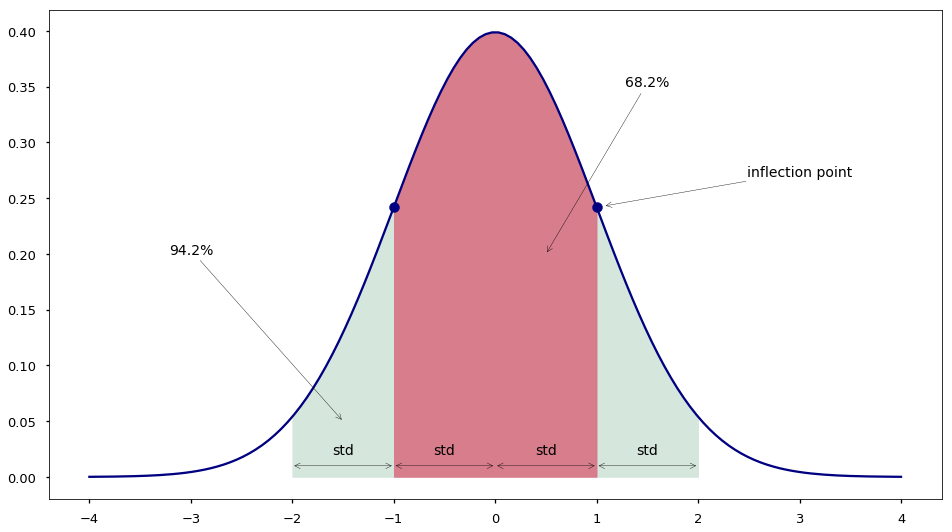

In [8]:
def gaussian(x, mean=0, std=1, var=1):
    return np.exp(-np.square(x-mean)/2*var)/(np.sqrt(2*np.pi*var))

arrow = {'facecolor': 'black', 'arrowstyle': '->'}
text = {'fontsize': 14, 'ha': 'center', 'arrowprops': arrow}
fig, ax = plt.subplots(figsize=(16, 9))

x = np.linspace(-4, 4, 128)
y = gaussian(x)
ax.plot(x, y, color='navy')
x = np.linspace(-2, 2, 128)
y = gaussian(x)
ax.fill_between(x, y, alpha=0.2, color='seagreen')
ax.annotate('94.2%', xy=(-1.5, 0.05), xytext=(-3, 0.2), **text)

x = np.linspace(-1, 1, 128)
y = gaussian(x)
ax.fill_between(x, y, alpha=0.5, color='crimson')
ax.annotate('68.2%', xy=(0.5, 0.2), xytext=(1.5, 0.35), **text)

x = np.array([-1, 1])
y = gaussian(x)
ax.scatter(x, y, s=100, color='navy')
ax.annotate('inflection point', xy=(x[1]+0.07, y[1]+0.001), xytext=(3, 0.27), **text)

def plot_std(ax, xy_left, xy_right):
    arrow['arrowstyle'] = '<->'
    ax.annotate('', xy=xy_left, xytext=xy_right, **text)
    xcentre = xy_left[0] + (xy_right[0] - xy_left[0])/2
    ax.text(xcentre, xy_left[1] + 0.01, 'std', ha='center', fontsize=14)
    arrow['arrowstyle'] = '->'

plot_std(ax, (-2, 0.01), (-1, 0.01))
plot_std(ax, (-1, 0.01), (0, 0.01))
plot_std(ax, (0, 0.01), (1, 0.01))
plot_std(ax, (1, 0.01), (2, 0.01))

The areas below the curve and the inflection points vary according how the Gaussian changes.
But the relations always stay true:

- The standard deviation is the vertical distance between the mean and the inflection point.
- The area within two standard deviations around the mean contains the majority of data.
- The area within four standard deviations contains roughly 95% of the data.

But all that assumes that our data is modeled by a Gaussian distribution.
Bear with me for a moment on this.

The Gaussian distribution above is a continuous distribution but there are as well
discrete distributions.  The discrete equivalent to the Gaussian distribution
is the Binomial distribution, which is pretty much the histogram of a Gaussian.

Yet, other distribution exist, for example the Poisson discrete distribution
models occurrence of an event.

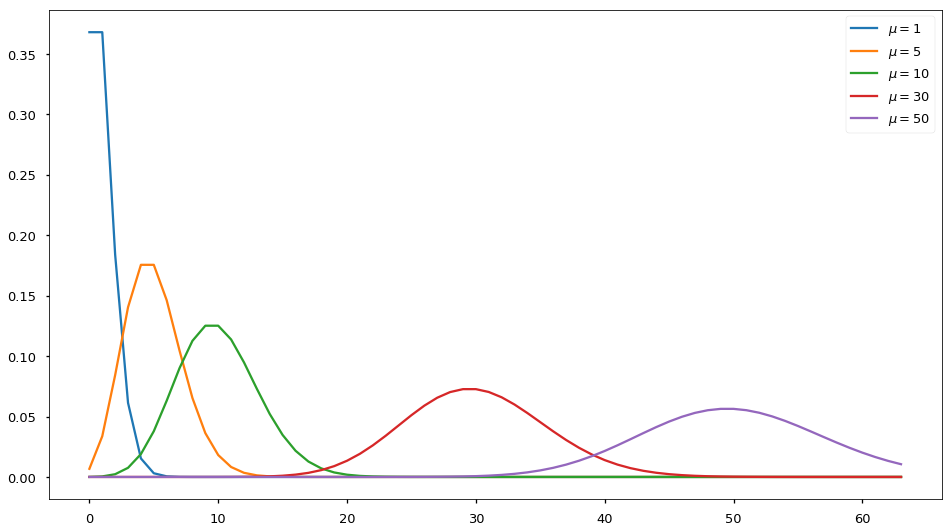

In [9]:
fig, ax = plt.subplots(figsize=(16, 9))

x = np.arange(64)
for mu in [1, 5, 10, 30, 50]:
    y = stats.poisson.pmf(x, mu)
    label = '$\mu = %s$' % mu
    ax.plot(x, y, label=label)
ax.legend();

And the continuous version of the event based distribution is the Weibull distribution.

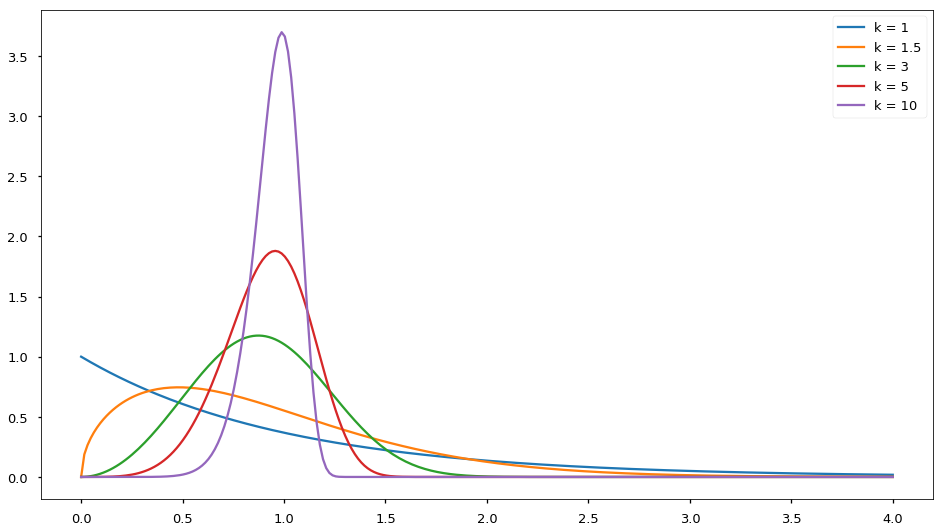

In [10]:
def weibull(x, gamma, k):
    return (k/gamma) * (x/gamma)**(k-1) * np.exp(-(x/gamma)**k)

fig, ax = plt.subplots(figsize=(16, 9))
x = np.linspace(0, 4, 256)
for k in [1, 1.5, 3, 5, 10]:
    y = weibull(x, 1, k)
    label = 'k = %s' % k
    ax.plot(x, y, label=label)
ax.legend();

Therefore the data can be modeled by quite a lot of different distributions, right?
Yes.  Yet in the vast majority of cases a Gaussian distribution turns out to be the best model.
This is because the sum of several continuous distributions can be approximated as a Gaussian distribution.
In other words, when distinct processes influence the data we measure, it is most likely
that we will see a Gaussian distribution.
Since each process affects the measures in a way that may result in some distribution,
a group of distinct processes will produce a sum of distinct distributions,
which tend towards a Gaussian.

That works for continuous distributions, the sum of discrete distributions vary,
yet *often* can be approximated with the Uniform distribution.

Let's try this out by summing together several Weibull distributions.
We plot here the evolution (cumulative sum) of adding more and more Weibull distributions.

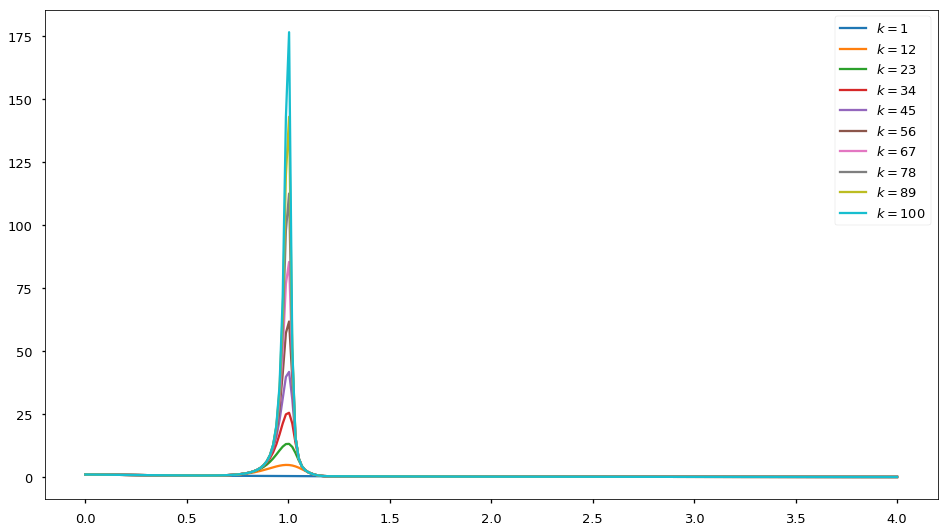

In [11]:
x = np.linspace(0, 4, 256)
y = []
fig, ax = plt.subplots(figsize=(16, 9))
for k in np.linspace(1, 100, 10):
    y.append(weibull(x, 1, k))
s = np.cumsum(np.array(y), axis=0)
k = 1
for i in s:
    label = '$k = %s$' % str(k)
    k += 11  # same as the linspace call above
    ax.plot(x, i, label=label)
ax.legend();

That last line definitely looks like a Gaussian.
Most of the time we will be working with data that is generated by a complex process,
i.e. by a combination of several processes.
Therefore the Gaussian assumption and the use of standard deviation is justified.
(Of course, if things do not work looking for another distribution is an option.)